<a href="https://colab.research.google.com/github/shashank08-spec/Ds-project/blob/main/Ds_Project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3
from google.colab import drive

# 1. Mount your Google Drive
drive.mount('/content/drive')
print("\nGoogle Drive mounted successfully!")

# 2. Define the path to your dataset in Google Drive
file_path = '/content/drive/My Drive/FPA_FOD_20170508.sqlite'

try:
    # 3. Connect to the SQLite database file
    conn = sqlite3.connect(file_path)
    print(f"Successfully connected to the database at: '{file_path}'!")

    # --- CORRECTION HERE ---
    # Explicitly set the correct table name instead of auto-detecting.
    table_name = 'Fires'
    print(f"Looking for table named: '{table_name}'")

    # 4. Define the columns to load
    columns_to_load = [
        'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'LATITUDE',
        'LONGITUDE', 'STATE', 'DISCOVERY_DATE', 'FIRE_SIZE'
    ]
    query = f"SELECT {', '.join(columns_to_load)} FROM {table_name}"

    # 5. Load the data from the 'Fires' table
    print("Loading data... this may take a moment.")
    df = pd.read_sql_query(query, conn)
    print("Initial data loaded.")

    # 6. Optimize DataFrame memory usage
    df['FIRE_YEAR'] = df['FIRE_YEAR'].astype('int16')
    df['LATITUDE'] = df['LATITUDE'].astype('float32')
    df['LONGITUDE'] = df['LONGITUDE'].astype('float32')
    df['FIRE_SIZE'] = df['FIRE_SIZE'].astype('float32')
    df['STATE'] = df['STATE'].astype('category')
    df['STAT_CAUSE_DESCR'] = df['STAT_CAUSE_DESCR'].astype('category')

    print("\nFull dataset loaded and optimized successfully!")
    print(f"Shape of the dataset: {df.shape}")
    display(df.head())

except Exception as e:
    print(f"\nAn error occurred: {e}")

finally:
    # 7. Close the connection
    if 'conn' in locals() and conn:
        conn.close()
        print("\nDatabase connection closed.")

Mounted at /content/drive

Google Drive mounted successfully!
Successfully connected to the database at: '/content/drive/My Drive/FPA_FOD_20170508.sqlite'!
Looking for table named: 'Fires'
Loading data... this may take a moment.
Initial data loaded.

Full dataset loaded and optimized successfully!
Shape of the dataset: (1880465, 7)


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE
0,2005,Miscellaneous,40.036945,-121.005836,CA,2453403.5,0.10
1,2004,Lightning,38.933056,-120.404442,CA,2453137.5,0.25
2,2004,Debris Burning,38.984165,-120.735558,CA,2453156.5,0.10
3,2004,Lightning,38.559166,-119.913330,CA,2453184.5,0.10
4,2004,Lightning,38.559166,-119.933052,CA,2453184.5,0.10



Database connection closed.


## Exploring Data

Inspecting Data

--- Missing Values Check ---
Series([], dtype: int64)
No missing values found in the selected columns. Great!

--- Distribution of Wildfire Causes ---
STAT_CAUSE_DESCR
Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: count, dtype: int64


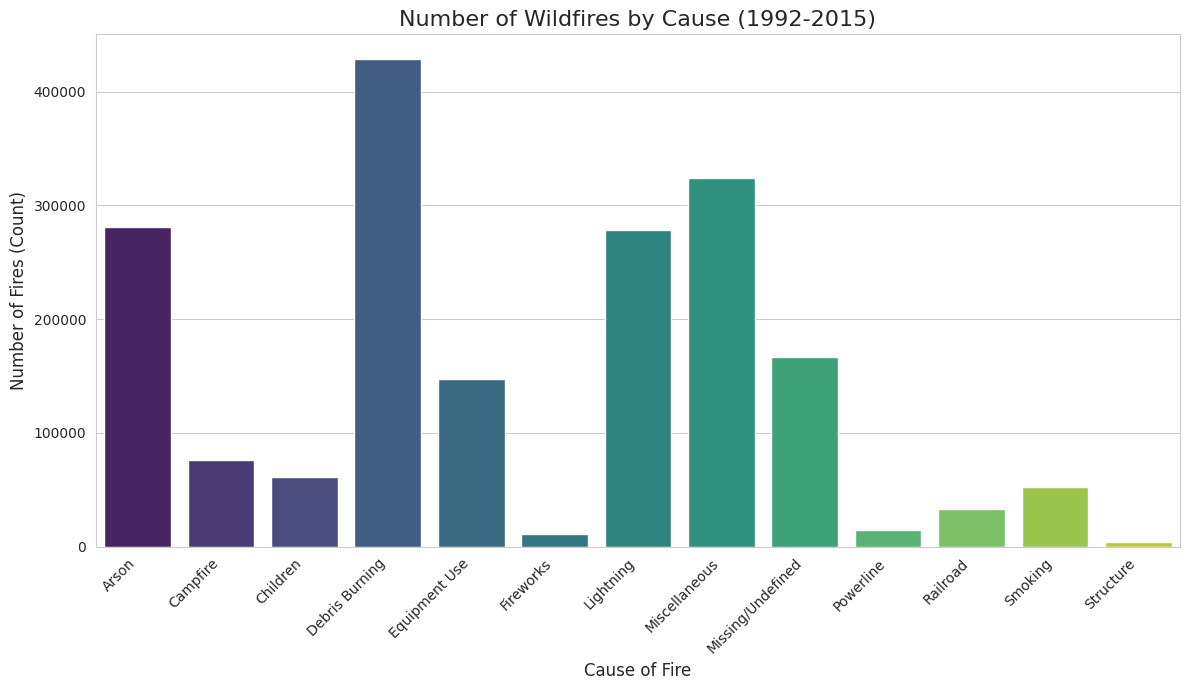

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a plotting style for better visuals
sns.set_style("whitegrid")

# --- Check for missing values ---
print("--- Missing Values Check ---")
# This will show the count of nulls in each column, if any
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("No missing values found in the selected columns. Great!")

# --- Explore the Target Variable (Wildfire Causes) ---
print("\n--- Distribution of Wildfire Causes ---")
cause_counts = df['STAT_CAUSE_DESCR'].value_counts()
print(cause_counts)


# --- Visualize the Target Variable ---
plt.figure(figsize=(12, 7))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='viridis', hue=cause_counts.index, legend=False)
plt.title('Number of Wildfires by Cause (1992-2015)', fontsize=16)
plt.xlabel('Cause of Fire', fontsize=12)
plt.ylabel('Number of Fires (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to make room for rotated labels
plt.show()

Extracting Month

--- Correct 'DATETIME' and 'MONTH' Features Created ---
This is how the corrected dates should look:


,DISCOVERY_DATETIME,MONTH
0,2005-02-02,2
1,2004-05-12,5
2,2004-05-31,5
3,2004-06-28,6
4,2004-06-28,6


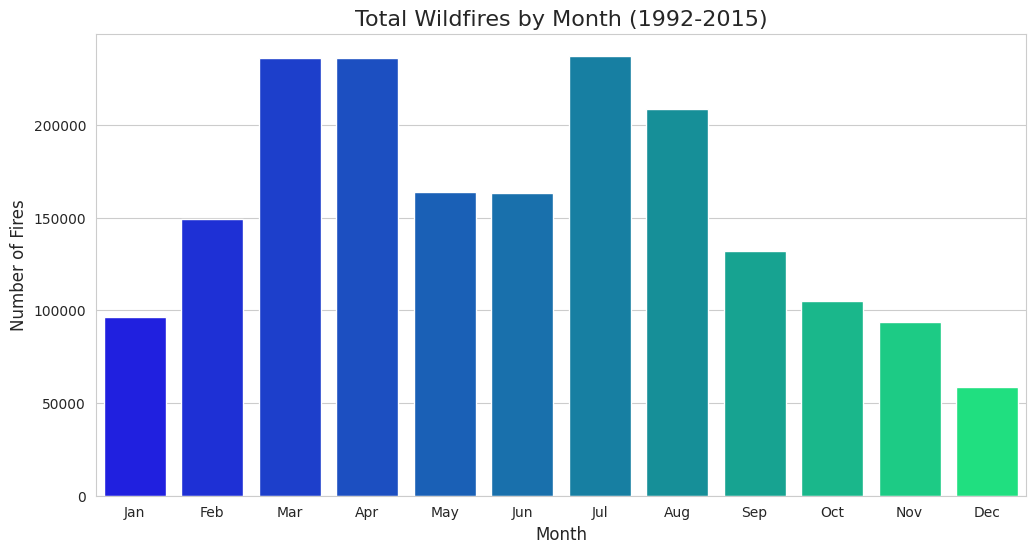

In [3]:
df['DISCOVERY_DATETIME'] = pd.to_datetime(df['DISCOVERY_DATE'], unit='D', origin='julian')

# Now, extract the month. This will be correct.
df['MONTH'] = df['DISCOVERY_DATETIME'].dt.month

print("--- Correct 'DATETIME' and 'MONTH' Features Created ---")
print("This is how the corrected dates should look:")
display(df[['DISCOVERY_DATETIME', 'MONTH']].head())


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MONTH', palette='winter', hue='MONTH', legend=False)
plt.title('Total Wildfires by Month (1992-2015)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

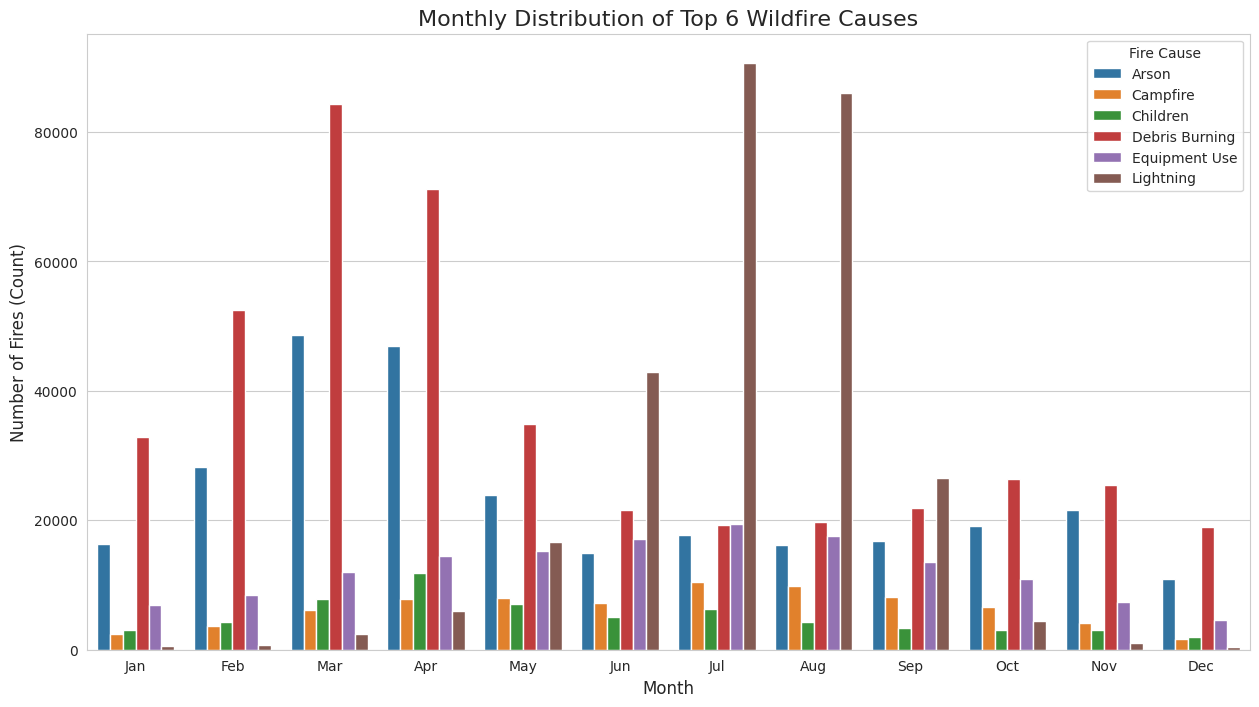

In [4]:

top_causes = ['Debris Burning', 'Arson', 'Lightning', 'Equipment Use', 'Campfire', 'Children']
df_top_causes = df[df['STAT_CAUSE_DESCR'].isin(top_causes)].copy()

df_top_causes['STAT_CAUSE_DESCR'] = df_top_causes['STAT_CAUSE_DESCR'].cat.remove_unused_categories()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.countplot(data=df_top_causes, x='MONTH', hue='STAT_CAUSE_DESCR', palette='tab10')

plt.title('Monthly Distribution of Top 6 Wildfire Causes', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Fires (Count)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Fire Cause')
plt.show()

## Preparing Data for Modeling


Spliting the data Training (80 %) and testing (20%)

In [5]:
from sklearn.model_selection import train_test_split

# --- 1. Clean the Target Variable ---
df_model = df[df['STAT_CAUSE_DESCR'] != 'Missing/Undefined'].copy()

# Remove the unused category from the column.
df_model['STAT_CAUSE_DESCR'] = df_model['STAT_CAUSE_DESCR'].cat.remove_unused_categories()

print(f"Original number of records: {df.shape[0]}")
print(f"Records after removing 'Missing/Undefined': {df_model.shape[0]}")


# 2. Define Features (X) and Target (y)
features = ['LATITUDE', 'LONGITUDE', 'STATE', 'MONTH']
target = 'STAT_CAUSE_DESCR'

X = df_model[features]
y = df_model[target]

print("\nFeatures (X) and Target (y) are now defined.")
print("\nFirst 5 rows of features (X):")
display(X.head())


# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTraining set has {X_train.shape[0]} records.")
print(f"Testing set has {X_test.shape[0]} records.")

Original number of records: 1880465
Records after removing 'Missing/Undefined': 1713742

Features (X) and Target (y) are now defined.

First 5 rows of features (X):


,LATITUDE,LONGITUDE,STATE,MONTH
0,40.036945,-121.005836,CA,2
1,38.933056,-120.404442,CA,5
2,38.984165,-120.735558,CA,5
3,38.559166,-119.913330,CA,6
4,38.559166,-119.933052,CA,6



Training set has 1370993 records.
Testing set has 342749 records.


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# --- 1. Define Preprocessing Steps ---
print("--- Building and Training Pipeline ---")
categorical_features = ['STATE']
numerical_features = ['LATITUDE', 'LONGITUDE', 'MONTH']

# Create a preprocessor to handle different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- 2. Create the Full Machine Learning Pipeline ---
# This is where 'pipeline' is defined
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='saga', random_state=42, n_jobs=-1))
                          ])

# --- 3. Train the Model ---
print("Training the Logistic Regression model...")
# This .fit() command trains the pipeline on your training data
pipeline.fit(X_train, y_train)

print("\nModel training complete!")

--- Building and Training Pipeline ---
Training the Logistic Regression model...

Model training complete!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Making predictions on the test set...

Model Accuracy: 42.56%

Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

         Arson       0.41      0.30      0.34     56291
      Campfire       0.00      0.00      0.00     15228
      Children       0.00      0.00      0.00     12233
Debris Burning       0.42      0.71      0.53     85806
 Equipment Use       0.24      0.00      0.00     29522
     Fireworks       0.00      0.00      0.00      2300
     Lightning       0.50      0.75      0.60     55694
 Miscellaneous       0.38      0.39      0.38     64761
     Powerline       0.00      0.00      0.00      2890
      Railroad       0.25      0.19      0.22      6691
       Smoking       0.00      0.00      0.00     10574
     Structure       0.00      0.00      0.00       759

      accuracy                           0.43    342749
     macro avg       0.18      0.19      0.17    342749
  weighted avg       0.35      0.43      0.36    342749


Generating Confusion Matrix...


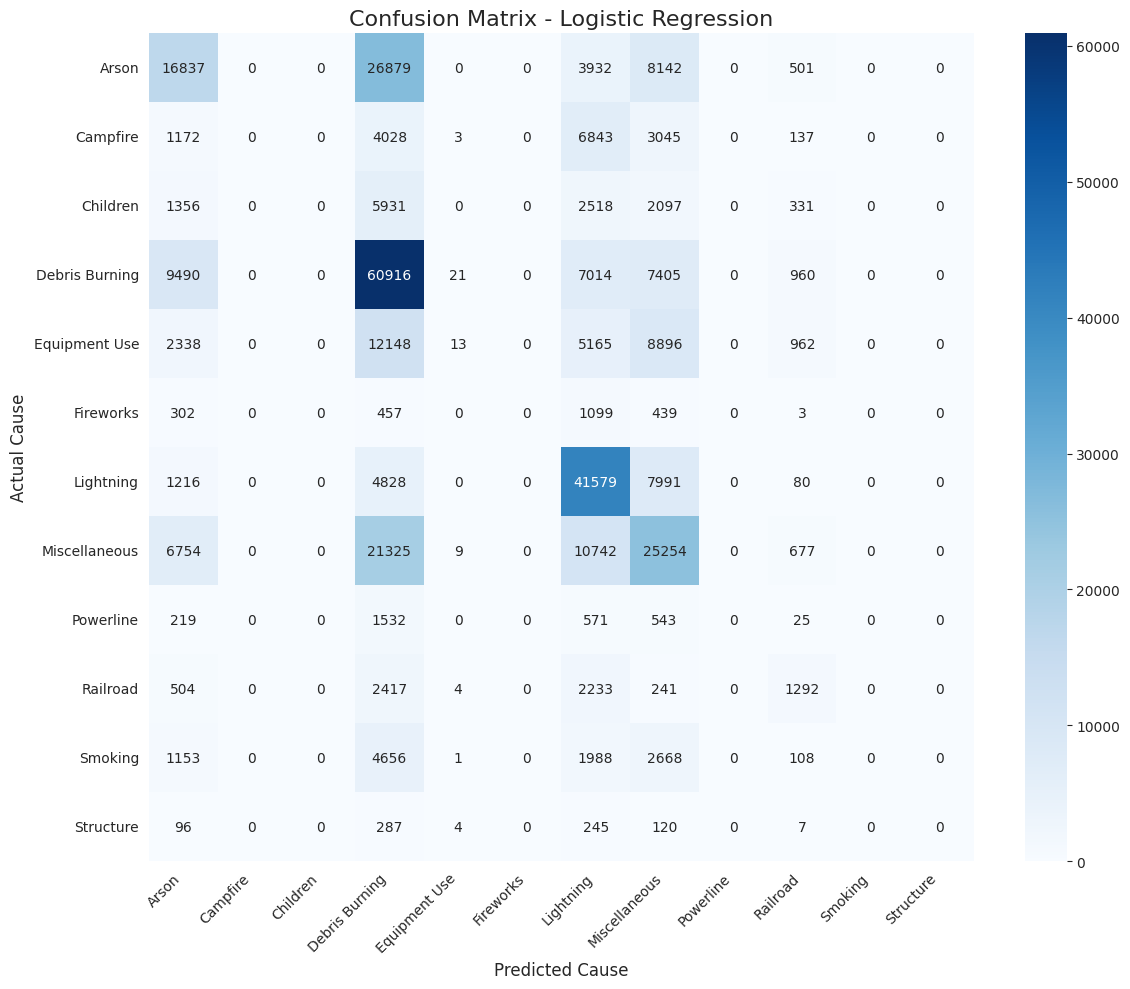

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Making predictions on the test set...")
# Use the trained pipeline to predict on the test data
y_pred = pipeline.predict(X_test)

# --- 1. Calculate Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# --- 2. Print Classification Report ---
# This gives precision, recall, and f1-score for each cause
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 3. Plot Confusion Matrix ---
print("\nGenerating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Cause', fontsize=12)
plt.ylabel('Actual Cause', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
# Install RAPIDS cuML
!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12 cuml-cu12

print("RAPIDS cuML installation complete.")

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 144.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.2/581.2 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 MB 128.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 169.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.5/366.5 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: nvidia-cusparse-cu12 12.5.4.2
    Uninstalling nvidia-cusparse-cu12-12.5.4.2:
      Successfully uninstalled nvidia-cusparse-cu12-12.5.4.2
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.7.77
    Uninstalling nvidia-curand-cu12-10.3.7.77:
      Successfully uninstalled nvidia-curand-cu12-10.3.7.77
  Attempting uni

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from cuml.ensemble import RandomForestClassifier as cuRF  # Import the GPU version
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# --- 1. Define Preprocessing Steps ---
print("--- Building Pipeline for GPU Random Forest (Corrected) ---")
categorical_features = ['STATE']
numerical_features = ['LATITUDE', 'LONGITUDE', 'MONTH']

# The sklearn preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        # --- FIX IS HERE: add sparse_output=False ---
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# --- 2. Convert y labels (already done, but we'll re-define) ---
print("Converting labels to int32 format for cuML...")
y_train_gpu = y_train.cat.codes.astype(np.int32)
y_test_gpu = y_test.cat.codes.astype(np.int32)
class_names = y_train.cat.categories


# --- 3. Create the Full Machine Learning Pipeline ---
rf_pipeline_gpu = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', cuRF(random_state=42))
                                 ])

# --- 4. Train the Model on the GPU ---
print("Training the GPU Random Forest model...")
rf_pipeline_gpu.fit(X_train, y_train_gpu)

print("\nRandom Forest model (GPU) training complete!")

# --- 5. Evaluate the Random Forest Model ---
print("Making predictions on the test set with GPU Random Forest...")
y_pred_rf_gpu = rf_pipeline_gpu.predict(X_test)

# Calculate and print the new accuracy
accuracy_rf_gpu = accuracy_score(y_test_gpu, y_pred_rf_gpu)
print(f"\nRandom Forest Model (GPU) Accuracy: {accuracy_rf_gpu * 100:.2f}%")

# Print the full classification report
print("\nRandom Forest (GPU) Classification Report:")
print(classification_report(y_test_gpu, y_pred_rf_gpu, target_names=class_names))

--- Building Pipeline for GPU Random Forest (Corrected) ---
Converting labels to int32 format for cuML...
Training the GPU Random Forest model...

Random Forest model (GPU) training complete!
Making predictions on the test set with GPU Random Forest...

Random Forest Model (GPU) Accuracy: 43.21%

Random Forest (GPU) Classification Report:
                precision    recall  f1-score   support

         Arson       0.44      0.24      0.31     56291
      Campfire       0.00      0.00      0.00     15228
      Children       0.00      0.00      0.00     12233
Debris Burning       0.40      0.79      0.53     85806
 Equipment Use       0.00      0.00      0.00     29522
     Fireworks       0.00      0.00      0.00      2300
     Lightning       0.53      0.76      0.62     55694
 Miscellaneous       0.39      0.38      0.38     64761
     Powerline       0.00      0.00      0.00      2890
      Railroad       0.00      0.00      0.00      6691
       Smoking       0.00      0.00      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# training model wit class weights

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Create a NEW Pipeline using the CPU RF ---
# We use the 'balanced' class_weight to fight imbalance.
print("--- Building and Training CPU Random Forest with Class Weights ---")

# We can re-use the 'preprocessor' from our Logistic Regression step
# Note: We are using the 'sklearn' (CPU) classifier here
rf_cpu_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', RandomForestClassifier(
                                      random_state=42,
                                      n_jobs=-1,  # Use all available CPU cores
                                      class_weight='balanced'
                                  ))
                                 ])

# --- 2. Train the Model ---
print("Training the CPU Random Forest model... (This may take longer than the GPU version)")
# We train on the original X_train and y_train (not the _gpu versions)
rf_cpu_pipeline.fit(X_train, y_train)

print("\nCPU Random Forest (Balanced) training complete!")

# --- 3. Evaluate the New Model ---
print("Making predictions with new model...")
y_pred_rf_cpu = rf_cpu_pipeline.predict(X_test)

accuracy_rf_cpu = accuracy_score(y_test, y_pred_rf_cpu)
print(f"\nCPU Random Forest (Balanced) Accuracy: {accuracy_rf_cpu * 100:.2f}%")

print("\nCPU Random Forest (Balanced) Classification Report:")
print(classification_report(y_test, y_pred_rf_cpu))

--- Building and Training CPU Random Forest with Class Weights ---
Training the CPU Random Forest model... (This may take longer than the GPU version)
